### f4 vs f5 vs groebner

11/17/2022

We benchmark for `psl` and for `boot` with 60 and 10 minutes maximum runtime cutoff respectively. 

Here, we only present benchmark results for `boot`; results for `psl` are similar.

#### Imports

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

In [143]:
# don't look at that :)
import pandas as pd
sys.path.append('/home/ademin/reduce3/reduce-algebra-code/generic/rbench')
import rbench as rb

### Loading data

In [155]:
f4 = rb.read_filetree('./f4/2022-11-17-10mn-boot/', 'f4').select('boot').deselect(['heapsize', 'valid'])
f5 = rb.read_filetree('./f5/2022-11-17-10mn-boot/', 'f5').select('boot').deselect(['heapsize', 'valid'])
groebner = rb.read_filetree('./groebner/2022-11-17-10mn-boot/', 'groebner').select('boot').deselect(['heapsize', 'valid'])

In [157]:
combo = f4.join(f5, how='inner').join(groebner, how='inner')

In [158]:
combo.head()

f4                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-11-17 20:47:26+01:00     2.44    0.00   
biomodels/BIOMD0000000003 2022-11-17 20:46:59+01:00     0.01    0.00   
biomodels/BIOMD0000000006 2022-11-17 20:47:25+01:00     0.01    0.00   
biomodels/BIOMD0000000024 2022-11-17 20:47:30+01:00     0.00    0.02   
biomodels/BIOMD0000000026 2022-11-17 20:46:42+01:00     0.03    0.01   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-11-17 20:47:28+01:00   
biomodels/BIOMD0000000003          NaN 2022-11-17 20:46:59+01:00   
biomodels/BIOMD0000000006          NaN 2022-11-17 20:47:26+01:00   
biomodels/BIOMD0000000024          NaN 2022-11-17 20:47:30+01:00   
biomodels/BIOMD0000000026          NaN 2022-11-17 20:46:42+01:00   

                                                 f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-11-17 20:50:41+01:00     0.17    0.02   
biomodels/BIOMD0000000003 2022-11-17 20:49:12+01:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-11-17 20:50:40+01:00     0.00    0.01   
biomodels/BIOMD0000000024 2022-11-17 20:54:18+01:00     0.01    0.01   
biomodels/BIOMD0000000026 2022-11-17 20:47:36+01:00     0.02    0.01   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-11-17 20:50:42+01:00   
biomodels/BIOMD0000000003          NaN 2022-11-17 20:49:12+01:00   
biomodels/BIOMD0000000006          NaN 2022-11-17 20:50:41+01:00   
biomodels/BIOMD0000000024          NaN 2022-11-17 20:54:18+01:00   
biomodels/BIOMD0000000026          NaN 2022-11-17 20:47:36+01:00   

                                           groebner                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-11-17 20:51:10+01:00     1.20    0.00   
biomodels/BIOMD0000000003 2022-11-17 20:57:23+01:00     0.01    0.00   
biomodels/BIOMD0000000006 2022-11-17 20:51:12+01:00     0.00    0.00   
biomodels/BIOMD0000000024 2022-11-17 20:50:11+01:00     0.00    0.01   
biomodels/BIOMD0000000026 2022-11-17 20:57:34+01:00     0.02    0.00   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-11-17 20:51:11+01:00  
biomodels/BIOMD0000000003          NaN 2022-11-17 20:57:23+01:00  
biomodels/BIOMD0000000006          NaN 2022-11-17 20:51:13+01:00  
biomodels/BIOMD0000000024          NaN 2022-11-17 20:50:11+01:00  
biomodels/BIOMD0000000026          NaN 2022-11-17 20:57:34+01:00

Let's plot `f5` vs. `f4` and `groebner` vs. `f4`:

In [160]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

In [163]:
x1 = combo[('f4', 'cpu_boot')]
y1 = combo[('f5', 'cpu_boot')]
x2 = combo[('f4', 'cpu_boot')]
y2 = combo[('groebner', 'cpu_boot')]

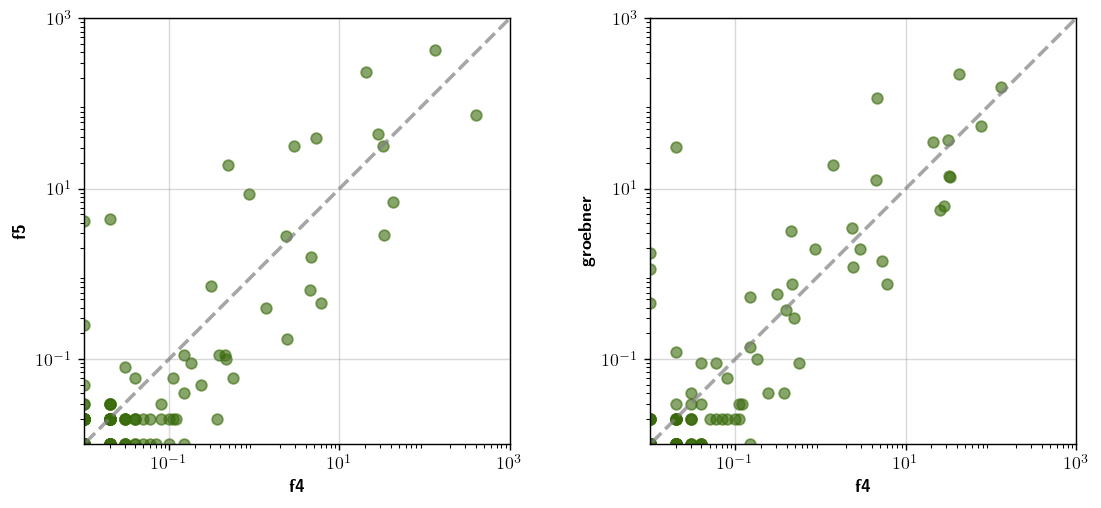

In [164]:
fig = plt.figure(figsize=(10, 10), dpi=128)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.subplots_adjust(wspace = 0.33 )

scatter1 = ax1.scatter(x1, y1, c='#396b0b', alpha=0.6)
scatter2 = ax2.scatter(x2, y2, c='#396b0b', alpha=0.6)

ax1.set_xlabel(r'\textbf{f4}')
ax1.set_ylabel(r'\textbf{f5}')
ax2.set_xlabel(r'\textbf{f4}')
ax2.set_ylabel(r'\textbf{groebner}')

for ax in [ax1, ax2]:

    ax.plot([0, 1000], [0, 1000], c='gray', linestyle='--', lw=2, alpha=0.7)

    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_aspect('equal')

    ax.set_xmargin(0)
    ax.set_ymargin(0)

    ax.set_xlim(xmin=0.01,xmax=1000)
    # only show 100 - 1600 on y-axis.
    ax.set_ylim(ymin=0.01,ymax=1000)

    ax.set_xticks([0.1, 10,  1000])
    ax.set_yticks([0.1, 10,  1000])

    # ax.set_xticks()
    # ax.set_yticks()

    ax.grid(True, alpha=0.3, c='gray')

plt.show()

Not very decisive.. 

### Looking at the tables

Out of models that took **more than 0.1 seconds** to compute (46 models in total),

- 45 were computed in time with `f4`,
- 36 with `f5`,
- and 38 with `groebner`.

In [184]:
t = 0.1
combo[(combo[("groebner", "cpu_boot")] > t) | (combo[("f4", "cpu_boot")] > t) | combo[("f4", "cpu_boot")].isna()].select("cpu_boot").deselect("sigxcpu_boot").describe()

,f4,f5,groebner
,cpu_boot,cpu_boot,cpu_boot
count,45.000000,37.000000,38.000000
mean,33.373556,30.985135,19.558947
std,76.526804,84.879591,46.436326
min,0.010000,0.010000,0.010000
25%,0.180000,0.060000,0.180000
50%,2.330000,0.450000,1.305000
75%,31.200000,8.600000,13.445000
max,403.310000,430.760000,221.780000


Let's look at overall runtimes of `f4` and `groebner`.

Aggregating by models from `systemsolving` that were computed successfuly, 

- `f4` took 349 seconds in total,
- `groebner` took 676 seconds in total.

Besides, 

- `f4` computed successfuly all of the models,
- `groebner` couldn't compute 3 models in time. 

In [169]:
df = combo.select("cpu_boot").deselect("sigxcpu_boot")[["f4", "groebner"]]
df_nona = df.dropna()

interesting = ["systemsolving/root9", "systemsolving/root10", "systemsolving/root11", 
        "systemsolving/cyclic5", "systemsolving/cyclic6",
        "systemsolving/katsura6", "systemsolving/katsura7",
        "systemsolving/noon5", "systemsolving/noon6", "systemsolving/noon7", "systemsolving/noon8",
        "systemsolving/eco5", "systemsolving/eco7", "systemsolving/eco10",
        "systemsolving/hairer2", "systemsolving/nbody4", "systemsolving/nbody5", 
        "systemsolving/henrion5", "systemsolving/henrion6"]
systemsolving = df.loc[interesting]
systemsolving_nona = systemsolving.dropna();

In [176]:
systemsolving_nona.sum()

f4        cpu_boot    349.14
groebner  cpu_boot    676.52
dtype: float64

Aggregating by **all other models** that were computed successfuly, 

- `f4` took 109 seconds in total,
- `groebner` took 68 seconds in total.

In [177]:
df_nona.sum() - systemsolving_nona.sum()

f4        cpu_boot    109.48
groebner  cpu_boot     68.26
dtype: float64

More detailed table of "interesing" models:

In [173]:
systemsolving

,f4,groebner
,cpu_boot,cpu_boot
systemsolving/root9,0.45,3.17
systemsolving/root10,1.39,19.24
systemsolving/root11,4.66,115.66
systemsolving/cyclic5,0.04,0.09
systemsolving/cyclic6,0.86,1.97
systemsolving/katsura6,2.33,3.50
systemsolving/katsura7,20.78,35.78
systemsolving/noon5,0.46,0.76
systemsolving/noon6,4.47,12.74


### Сareful conclusions:



`f4` is better than `groebner` on our benchmark; 

- `f4` total runtime is less by a factor of two,
- `f4` has successfuly computed 7 more models in time (out of 49).